# Bag-of-words (BoW) — worek słów

W przetwarzaniu języka naturalnego **BoW** jest to technika **uproszczonej reprezentacji tekstu**. Polega ona na przekształceniu sekwencji segmentów do postaci zbioru segmentów z ich licznością. Bazuje na założeniu, że **znaczenie danego tekstu wynika ze znaczenia jego elementów składowych**.


**Główne cechy BoW:**

*  Kolejność segmentów w dokumencie zostaje pominięta.
*  Istotność segmentów zależy wyłącznie od liczby ich wystąpień w dokumencie.
*  Reprezentacja danego dokumentu nie zależy od innych dokumentów w kolekcji.


```
"Ala głaszcze kota" => {"Ala": 1, "głaszcze": 1, "kota": 1}
"kota głaszcze Ala" => {"Ala": 1, "głaszcze": 1, "kota": 1}
```


**Zastosowanie:**

*  Odwzorowanie podobieństwa znaczeniowego dokumentów:
  *  Grupowanie i klasyfikacja tematyczna tekstów.
  *  Wyszukiwanie informacji.
* Możliwość wykorzystania miar podobieństwa zbiorów (np. indeks Jaccarda) lub wektorów (np. miara kosinusowa).

## BoW dla form tekstowych

In [1]:
texts = [
  "Ania ma białego kota.",
  "Ania z naprzeciwka ma uroczego białego kota.",
  "Kot Ani jest biały.",
  "Marek ma czerwony samochód."
]

In [2]:
from nltk.tokenize import WordPunctTokenizer

tokenizer = WordPunctTokenizer()
tokenizer

WordPunctTokenizer(pattern='\\w+|[^\\w\\s]+', gaps=False, discard_empty=True, flags=<RegexFlag.UNICODE|DOTALL|MULTILINE: 56>)

In [3]:
docs_orth = [tokenizer.tokenize(text) for text in texts]
docs_orth

[['Ania', 'ma', 'białego', 'kota', '.'],
 ['Ania', 'z', 'naprzeciwka', 'ma', 'uroczego', 'białego', 'kota', '.'],
 ['Kot', 'Ani', 'jest', 'biały', '.'],
 ['Marek', 'ma', 'czerwony', 'samochód', '.']]

In [4]:
from nltk.probability import FreqDist

bows_orth = [FreqDist(doc) for doc in docs_orth]
bows_orth

[FreqDist({'.': 1, 'Ania': 1, 'białego': 1, 'kota': 1, 'ma': 1}),
 FreqDist({'.': 1,
           'Ania': 1,
           'białego': 1,
           'kota': 1,
           'ma': 1,
           'naprzeciwka': 1,
           'uroczego': 1,
           'z': 1}),
 FreqDist({'.': 1, 'Ani': 1, 'Kot': 1, 'biały': 1, 'jest': 1}),
 FreqDist({'.': 1, 'Marek': 1, 'czerwony': 1, 'ma': 1, 'samochód': 1})]

### Miara podobieństwa w oparciu o indeks Jaccarda

**Indeks Jaccarda** to wskaźnik używany do pomiaru podobieństwa zbiorów.

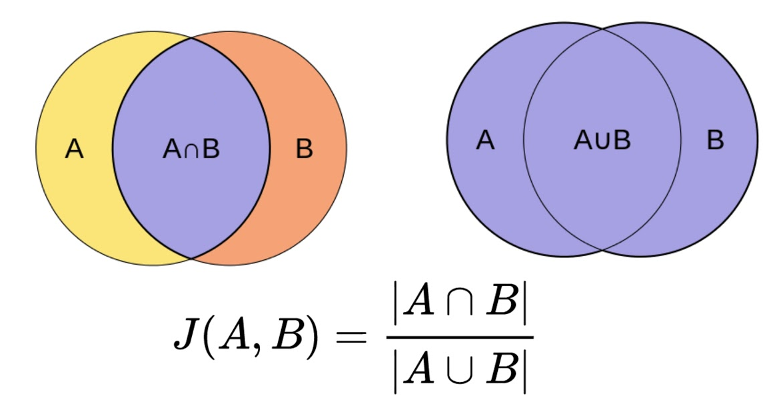

https://en.wikipedia.org/wiki/Jaccard_index

In [5]:
def bow_similarity(bow1: FreqDist, bow2: FreqDist) -> float:
  bow_all = bow1 + bow2
  bow_common = [word for word in bow_all.keys() if word in bow1 and word in bow2]
  return 0 if len(bow_all) == 0 else len(bow_common) / len(bow_all)

In [6]:
print(texts[0])
print("-"*20)

for n in range(1, 4):
  sim = bow_similarity(bows_orth[0], bows_orth[n])
  print(f"{sim:<6.4}  {texts[n]}")

Ania ma białego kota.
--------------------
0.625   Ania z naprzeciwka ma uroczego białego kota.
0.1111  Kot Ani jest biały.
0.25    Marek ma czerwony samochód.


## BoW dla lematów

*   Będziemy korzystać z modelu pl_core_news_sm
*   Model wymaga spaCy w wersji 2.3

In [7]:
!pip install spacy -U

Requirement already up-to-date: spacy in /usr/local/lib/python3.6/dist-packages (2.3.4)


In [8]:
!python -m spacy download pl_core_news_sm
!python -m spacy link pl_core_news_sm pl_core_news_sm -f

✔ Download and installation successful
You can now load the model via spacy.load('pl_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/pl_core_news_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/pl_core_news_sm
You can now load the model via spacy.load('pl_core_news_sm')


In [9]:
import spacy
nlp = spacy.load('pl_core_news_sm')

In [10]:
docs_lemma = [nlp(text) for text in texts]
docs_lemma

[Ania ma białego kota.,
 Ania z naprzeciwka ma uroczego białego kota.,
 Kot Ani jest biały.,
 Marek ma czerwony samochód.]

In [11]:
bows_lemma = [FreqDist([t.lemma_.lower() for t in doc]) for doc in docs_lemma]
bows_lemma

[FreqDist({'.': 1, 'ania': 1, 'biały': 1, 'kot': 1, 'mieć': 1}),
 FreqDist({'.': 1,
           'ania': 1,
           'biały': 1,
           'kot': 1,
           'mieć': 1,
           'naprzeciwka': 1,
           'uroczy': 1,
           'z': 1}),
 FreqDist({'.': 1, 'ania': 1, 'biały': 1, 'być': 1, 'kota': 1}),
 FreqDist({'.': 1, 'czerwony': 1, 'marka': 1, 'mieć': 1, 'samochód': 1})]

In [12]:
print(texts[0])
print("-"*20)

for n in range(1, 4):
  sim = bow_similarity(bows_lemma[0], bows_lemma[n])
  print(f"{sim:<6.4}  {texts[n]}")

Ania ma białego kota.
--------------------
0.625   Ania z naprzeciwka ma uroczego białego kota.
0.4286  Kot Ani jest biały.
0.25    Marek ma czerwony samochód.


### Interpretacja formy 'kot'

**Słownik morfologiczny Morfeusz SGJP**

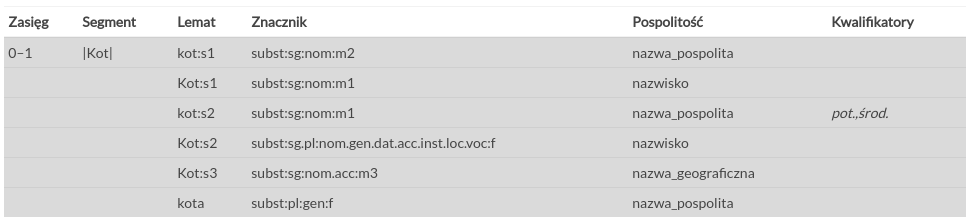
http://morfeusz.sgjp.pl/demo/

**Definicja leksemu w Słowosieci**

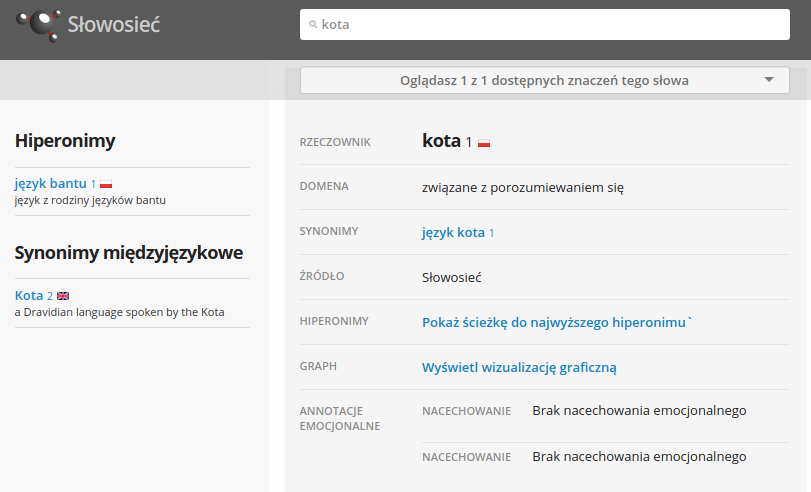

http://plwordnet.pwr.wroc.pl/wordnet/64122c4a-28e9-11eb-bdfe-6f48bdf51c10

**Ścieżka do najwyższego hiperonimu**


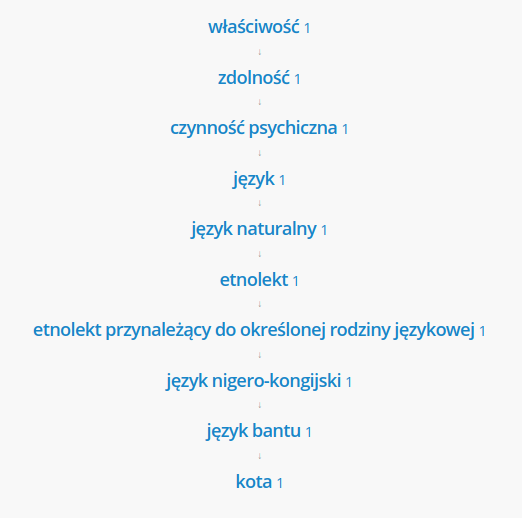


## Wektoryzacja

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

In [14]:
sentences = [" ".join([t.lemma_.lower() for t in doc]) for doc in docs_lemma]
print(sentences)

['ania mieć biały kot .', 'ania z naprzeciwka mieć uroczy biały kot .', 'kota ania być biały .', 'marka mieć czerwony samochód .']


In [15]:
X = vectorizer.fit_transform(sentences)
print(X.toarray())

[[1 1 0 0 1 0 0 1 0 0 0]
 [1 1 0 0 1 0 0 1 1 0 1]
 [1 1 1 0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 1 1 0 1 0]]


In [16]:
vectorizer.get_feature_names()

['ania',
 'biały',
 'być',
 'czerwony',
 'kot',
 'kota',
 'marka',
 'mieć',
 'naprzeciwka',
 'samochód',
 'uroczy']

In [17]:
from sklearn.metrics.pairwise import cosine_similarity

sim = cosine_similarity(X, X)
sim

array([[1.        , 0.81649658, 0.5       , 0.25      ],
       [0.81649658, 1.        , 0.40824829, 0.20412415],
       [0.5       , 0.40824829, 1.        , 0.        ],
       [0.25      , 0.20412415, 0.        , 1.        ]])

In [18]:
print(texts[0])
print("-"*20)

for n in range(1, 4):
  print(f"{sim[0][n]:<6.4}  {texts[n]}")

Ania ma białego kota.
--------------------
0.8165  Ania z naprzeciwka ma uroczego białego kota.
0.5     Kot Ani jest biały.
0.25    Marek ma czerwony samochód.


## Podsumowanie

1.   **Bag of words (BoW)** — technika uproszczonej reprezentacji tekstu.
2.   Tekst reprezentowany jest jako zbiór elementów (form tekstowych, bądź lematów) z ich licznością.
3.   Możliwość porównania dokumentów z wykorzystaniem operacji na zbiorach (indeks Jaccarda) lub wektorach (miara kosinusowa).
4.   Istotność elementów wynika wyłącznie z częstości danego słowa w tekście.

